# Reproducing Fig 2

In [1]:
%load_ext autoreload
%autoreload 2
import pens
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
pens.set_style()

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'LMR v2.1'}, xlabel='Time [yrs]', ylabel='GMST [°C]'>)

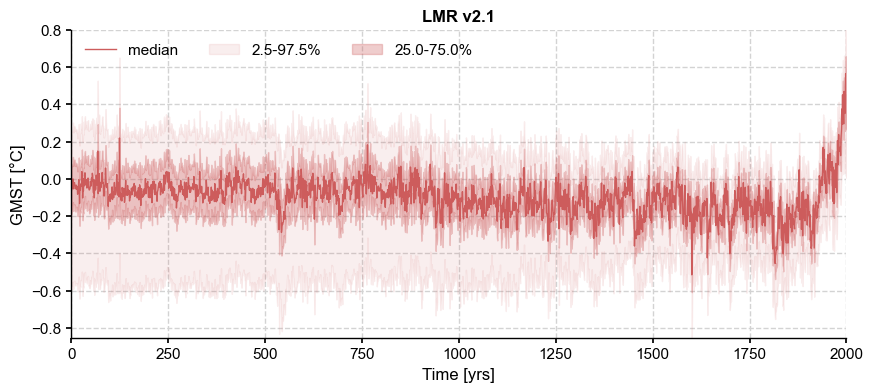

In [2]:
path = '../data/gmt_MCruns_ensemble_full_LMRv2.1.nc'
LMR = pens.EnsembleTS().load_nc(path, var='gmt')
LMR.label = 'LMR v2.1'
LMR.value_name = 'GMST'
LMR.value_unit = '\N{DEGREE SIGN}C'
LMR.time_name = 'Time'
LMR.time_unit = 'yrs'
LMR.plot_qs()

In [3]:
df = pd.read_table('../data/PMIP3_GMST.txt')
# create a new pandas.DataFrame to store the processed data
dfn = df.copy()

# remove the data columns for CESM and GISS ensemble members
for i in range(10):
    dfn = dfn.drop([f'CESM_member_{i+1}'], axis=1)
    
dfn = dfn.drop(['GISS-E2-R_r1i1p127.1'], axis=1)
dfn = dfn.drop(['GISS-E2-R_r1i1p127'], axis=1)
dfn = dfn.drop(['GISS-E2-R_r1i1p121'], axis=1)

# calculate the ensemble mean for CESM and GISS, and add the results into the table
dfn['CESM'] = df[[
    'CESM_member_1',
    'CESM_member_2',
    'CESM_member_3',
    'CESM_member_4',
    'CESM_member_5',
    'CESM_member_6',
    'CESM_member_7',
    'CESM_member_8',
    'CESM_member_9',
    'CESM_member_10',
]].mean(axis=1)

dfn['GISS'] = df[[
    'GISS-E2-R_r1i1p127.1',   
    'GISS-E2-R_r1i1p127',
    'GISS-E2-R_r1i1p121',
]].mean(axis=1)

# display the processed data
dfn

,Year,bcc_csm1_1,CCSM4,FGOALS_gl,FGOALS_s2,IPSL_CM5A_LR,MPI_ESM_P,CSIRO,HadCM3,CESM,GISS
0,850,-0.570693,-0.431830,NaN,-0.620995,-0.475963,-0.170230,NaN,-0.620517,0.049553,0.127429
1,851,-0.698903,-0.411177,NaN,-0.753160,-0.742970,-0.303124,-0.398695,-0.553043,0.193858,0.138796
2,852,-0.575440,-0.404802,NaN,-0.743508,-0.758939,-0.422623,-0.406343,-0.560791,0.185033,0.098170
3,853,-0.724757,-0.552719,NaN,-0.869331,-0.746460,-0.335177,-0.353557,-0.438949,0.120470,-0.054552
4,854,-0.724328,-0.734938,NaN,-0.826238,-0.684093,-0.650792,-0.416140,-0.812194,-0.081349,-0.407169
...,...,...,...,...,...,...,...,...,...,...,...
1161,2011,1.013544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1162,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1163,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1164,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NaNs have been detected and dropped.
Time axis values sorted in ascending order
NaNs have been detected and dropped.
Time axis values sorted in ascending order
NaNs have been detected and dropped.
Time axis values sorted in ascending order
NaNs have been detected and dropped.
Time axis values sorted in ascending order
NaNs have been detected and dropped.
Time axis values sorted in ascending order
NaNs have been detected and dropped.
Time axis values sorted in ascending order
NaNs have been detected and dropped.
Time axis values sorted in ascending order
NaNs have been detected and dropped.
Time axis values sorted in ascending order
NaNs have been detected and dropped.
Time axis values sorted in ascending order
NaNs have been detected and dropped.
Time axis values sorted in ascending order


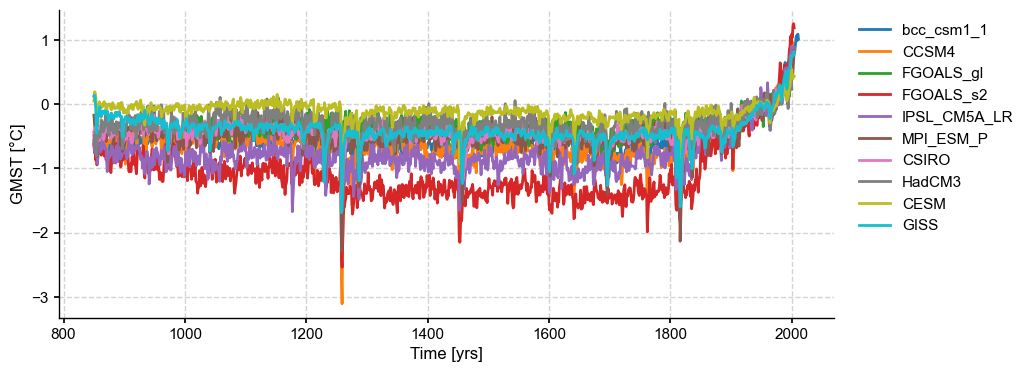

In [4]:
# store each pyleoclim.Series() object into a dictionary and plot
import pyleoclim as pyleo
ts_dict = {}
for name in dfn.columns[1:]:
    ts_dict[name] = pyleo.Series(
        time=dfn['Year'].values,  # the time axis
        value=dfn[name].values,   # the value axis
        label=name,                  # optional metadata: the nickname of the series
        time_name='Time',            # optional metadata: the name of the time axis
        time_unit='yrs',             # optional metadata: the unit of the time axis
        value_name='GMST',     # optional metadata: the name of the value axis
        value_unit='\N{DEGREE SIGN}C',              # optional metadata: the unit of the value axis
    )

ts_list = [v for k, v in ts_dict.items()]  # a pythonic way to convert the pyleo.Series items in the dictionary to a list
ms_pmip = pyleo.MultipleSeries(ts_list)
fig, ax = ms_pmip.plot(lgd_kwargs={
        'bbox_to_anchor': (1.25, 1),  # move the legend to the right side
    })

Next we compute the Mean Squared Error between the target series (CCSM4) and all possible trajectories within the ensemble, then find a trajectory that mimimizes it:

(<Figure size 1200x400 with 1 Axes>,
 <Axes: xlabel='Time [yrs]', ylabel='GMST [°C]'>)

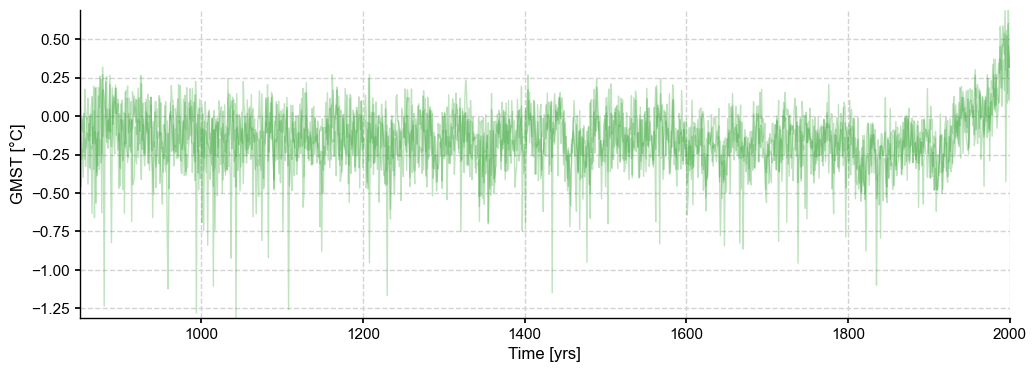

In [5]:
ts = ts_list[7] # select HadCM3
common_time = [850,2000]
lmr_slice = LMR.slice(common_time)
HadCM3 = ts.slice(common_time)
path_nearest = lmr_slice.sample_nearest(HadCM3.value, metric='MSE')
dist = path_nearest.distance  # extract distance metric
#
ens_unif = lmr_slice.random_paths(model='unif',p=3, seed=44)
ens_unif.plot(color='tab:green',alpha=0.3)

Let's get the HDI score of each of these. 

In [6]:
import numpy as np
ns = ens_unif.nEns
hdi_score = np.zeros((ns))
for k in range(ns):
    hdi_score[k], _ = lmr_slice.hdi_score(y=ens_unif.value[:,k])

## Spectral analysis

In [7]:
es_orig = lmr_slice.to_pyleo(verbose=False,auto_time_params=True)  
PSD_orig = es_orig.spectral(method='mtm',settings={'standardize':False}) # this generates a MultiplePSD object

Performing spectral analysis on individual series: 100%|██████████| 2000/2000 [00:36<00:00, 54.36it/s]


In [8]:
PSD_orig_aa = PSD_orig.anti_alias()

Applying the anti-alias filter: 100%|██████████| 2000/2000 [00:13<00:00, 144.98it/s]


In [9]:
ps_rnd = lmr_slice.random_paths(model='unif',p=LMR.nEns, seed=2333)
es_rnd = ps_rnd.to_pyleo(verbose=False,auto_time_params=True) # resample while preserving ensemble size
PSD_rnd = es_rnd.spectral(method='mtm',settings={'standardize':False})

Performing spectral analysis on individual series: 100%|██████████| 2000/2000 [00:36<00:00, 55.28it/s]


In [10]:
PSD_rnd_aa = PSD_rnd.anti_alias()

Applying the anti-alias filter: 100%|██████████| 2000/2000 [00:17<00:00, 113.09it/s]


In [11]:
percent = lmr_slice.trace_rank(y=HadCM3.value)

## Making the figure

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

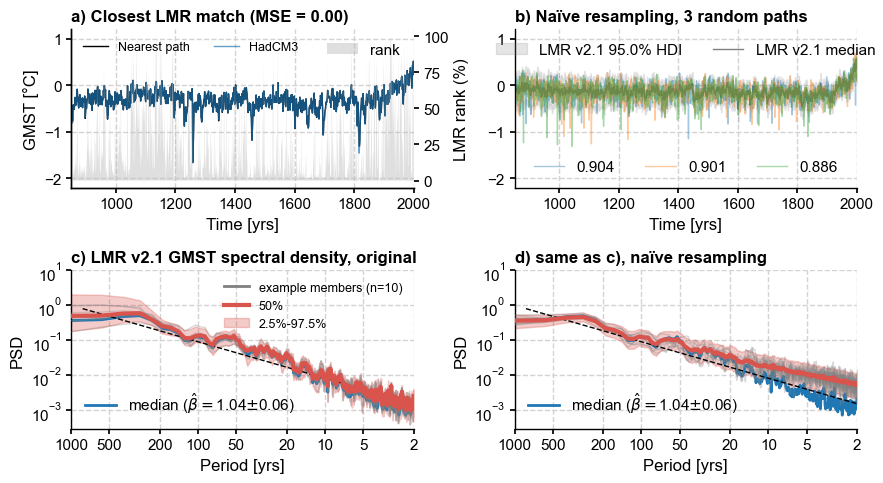

In [12]:
fig, axs = plt.subplots(2,2,figsize=(9,5))
axs = axs.flatten()

# a) closest match
ax0 = axs[0].twinx()
ax0.grid(False)
ax0.fill_between(lmr_slice.time, 0, percent, alpha=0.5, zorder=0,
                 facecolor='silver', label='rank')
ax0.set_ylabel('LMR rank (%)')
path_nearest.plot(ax=axs[0],color='k', label='Nearest path')
ts.plot(ax=axs[0], ylim=(-2.2, 1.2), alpha=0.7, linewidth=1)
axs[0].legend(loc='upper left', ncol=2, fontsize=9,framealpha = 0.9)
axs[0].set_title(f'a) Closest LMR match (MSE = {dist:3.2f})',
                 loc = 'left', fontweight = 'bold')
ax0.legend()
# b) naive resampling 
lmr_slice.plot_hdi(prob=0.95, color='gray',ax=axs[1],title='')
ens_unif.plot(ax=axs[1],alpha=0.4, ylabel='', label = 'duh', legend_kwargs={'show':True})
axs[1].set_title('b) Naïve resampling, 3 random paths',
                 loc = 'left', fontweight = 'bold')
axs[1].set_ylim(axs[0].get_ylim())
# split the legend in 2 parts
h, l = axs[1].get_legend_handles_labels()
l2 = [f'{hdi_score[k]:3.3f}' for k in range(ns)]
legend1 = axs[1].legend(handles=h[:2], loc='upper center', ncol=2)
axs[1].add_artist(legend1)
legend2 = axs[1].legend(handles=h[2:], labels = l2, loc='lower center', ncol=3)

# c) Undisturbed spectra 
ylims = [3e-4,10]
PSD_orig_aa.plot_envelope(ax=axs[2])
axs[2].set_title('c) LMR v2.1 GMST spectral density, original',
                 loc = 'left', fontweight = 'bold')
esm = lmr_slice.get_median() # extract and analyze the ensemble median
esm = esm.to_pyleo(label='median',verbose=False,auto_time_params=True)
esm_spec = esm.spectral(method ='mtm',settings={'standardize':False})
esm_beta = esm_spec.anti_alias().beta_est() # estimate spectral exponent
esm_beta.plot(ax=axs[2], ylim=ylims)
             #lgd_kwargs={'loc':'upper right','fontsize':8})
h, l = axs[2].get_legend_handles_labels()
legend1 = axs[2].legend(handles=h[:3], loc='upper right',fontsize = 9)
axs[2].add_artist(legend1)
legend2 = axs[2].legend(handles=h[3:], loc='lower left')

# d) Resampled spectra
PSD_rnd_aa.plot_envelope(ax=axs[3])
axs[3].set_title('d) same as c), naïve resampling',
                 loc = 'left', fontweight = 'bold')
esm_rnd = ps_rnd.get_median() # extract and analyze the ensemble median
esm_rnd = esm_rnd.to_pyleo(label='median',verbose=False,auto_time_params=True)
esm_rnd_spec = esm_rnd.spectral(method ='mtm',settings={'standardize':False})
esm_rnd_beta = esm_rnd_spec.anti_alias().beta_est() # estimate spectral exponent
esm_rnd_beta.plot(ax=axs[3],ylim=ylims, ylabel='PSD')
h, l = axs[3].get_legend_handles_labels()
axs[3].get_legend().remove()
axs[3].set_xlabel(axs[2].get_xlabel()) # make labels the same
axs[3].legend(handles=h[3:], loc='lower left')
fig.tight_layout()